<a href="https://colab.research.google.com/github/StillWork/colab-1/blob/master/h_2_cld%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 랜덤포레스트

## 소개

### 교육 방법

Jeremy Howard의 강의


탑 다운 방식으로 접근하여 큰 그림을 파악하도록 한다.

일단 동작하는 프로그램을 만들어본다!

### Your practice

캐글 문제를 풀어보고, 커널을 통해서 설명을 배운다.

참고 블로그:

- [Peter Norvig](http://nbviewer.jupyter.org/url/norvig.com/ipython/ProbabilityParadox.ipynb) (more [here](http://norvig.com/ipython/))
- [Stephen Merity](https://smerity.com/articles/2017/deepcoder_and_ai_hype.html)
- [Julia Evans](https://codewords.recurse.com/issues/five/why-do-neural-networks-think-a-panda-is-a-vulture) (more [here](https://jvns.ca/blog/2014/08/12/what-happens-if-you-write-a-tcp-stack-in-python/))
- [Julia Ferraioli](http://blog.juliaferraioli.com/2016/02/exploring-world-using-vision-twilio.html)
- [Edwin Chen](http://blog.echen.me/2014/10/07/moving-beyond-ctr-better-recommendations-through-human-evaluation/)
- [Slav Ivanov](https://blog.slavv.com/picking-an-optimizer-for-style-transfer-86e7b8cba84b) (fast.ai student)
- [Brad Kenstler](https://hackernoon.com/non-artistic-style-transfer-or-how-to-draw-kanye-using-captain-picards-face-c4a50256b814) (fast.ai and USF MSAN student)

### Books

참고서적:

- [Python for Data Analysis, 2nd ed](https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1491957662/ref=asap_bc?ie=UTF8).

- [Introduction to Machine Learning with Python](https://www.amazon.com/Introduction-Machine-Learning-Andreas-Mueller/dp/1449369413): 
- [Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow, 2nd Edition](https://www.amazon.com/Python-Machine-Learning-scikit-learn-TensorFlow/dp/1787125939/ref=dp_ob_title_bk): 
- [Hands-On Machine Learning with Scikit-Learn and TensorFlow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291/ref=pd_lpo_sbs_14_t_0?_encoding=UTF8&psc=1&refRID=MBV2QMFH3EZ6B3YBY40K)


### 강의 내용

- 훈련, 검증, 테스트
- 트리, 앙상블
- 머신러닝
- 특성 공학, 임베딩
- 경사하강법
- 신경망
- PyTorch
- KNN
- 교차검증, 부트스트랩

## Imports

In [0]:
# 모듈 소스를 수정한 경우 수정된 내용이 모듈에 자동 반영되도록 함
%load_ext autoreload
%autoreload 2
# 그래프가 현재 노트북에 그려지도록 함
%matplotlib inline

## fastai 모듈 설치

In [0]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [0]:
torch.cuda.is_available()
torch.backends.cudnn.enabled

True

In [0]:
!ls clouderizer/fast.ai/data/

dogscats


### 구글 드라이브 연결



In [0]:
# # Load the Drive helper and mount
# from google.colab import drive
# # This will prompt for authorization.
# drive.mount('/content/drive')

In [0]:
# # ??
# if not os.path.exists("./data"):
#     os.makedirs("./data")
# # if not os.path.exists("./data/cats_and_dogs_filtered.zip"):
  
# !wget https://www.kaggle.com/c/3316/download-all \
#     -O ./data/all.zip

--2019-01-05 10:29:54--  https://www.kaggle.com/c/3316/download-all
Resolving www.kaggle.com (www.kaggle.com)... 23.96.207.25
Connecting to www.kaggle.com (www.kaggle.com)|23.96.207.25|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.kaggle.com/account/login?ReturnUrl=%2Fc%2F3316%2Fdownload-all [following]
--2019-01-05 10:29:54--  https://www.kaggle.com/account/login?ReturnUrl=%2Fc%2F3316%2Fdownload-all
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘./data/all.zip’

./data/all.zip          [ <=>                ]   7.94K  --.-KB/s    in 0.001s  

2019-01-05 10:29:55 (9.79 MB/s) - ‘./data/all.zip’ saved [8135]



In [0]:
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls ./drive/My\ Drive/Colab\ Notebooks/data/Train*

'./drive/My Drive/Colab Notebooks/data/Train.zip'


In [0]:
# !rm ./drive/My\ Drive/Colab\ Notebooks/data/Train.csv

In [0]:
import zipfile
local_zip = './drive/My Drive/Colab Notebooks/data/Train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data')
zip_ref.close()

In [0]:
!ls data

Train.csv


In [0]:
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [0]:
# PATH = "data/bulldozers/"

In [0]:
!ls {PATH}

ls: cannot access 'data/bulldozers/': No such file or directory


# 불도져 블루북 예

### 문제 접근법

대부분의 문제는 다음의 머신러닝 모델로 해결된다.

- (구조화된 데이터) 랜덤 포레스트, 그라디언트 부스팅
- (비정형 데이터) 신경망

여기서 다룰 문제는, 중장비의 사용 이력을 보고 가격을 예측하는 문제이다. 

### 캐글 경연 사이트

캐글에서는 문제, 데이터, 피드백을 받을 수 있고 우수한 예제를 볼 수 있다.

## 데이터

### 데이터 보기

데이터에 대한 상세 내용을 여기서 볼 수 있으며 [Kaggle Data info](https://www.kaggle.com/c/bluebook-for-bulldozers/data) 데이터는 다음과 같이 세가지로 구성되어 있다.

- **Train.csv**  2011년까지의 훈련데이터
- **Valid.csv** January 1, 2012 - April 30, 2012 동안의 검증 데이터. 이를 기반으로 캐글의 등수가 발표된다.
- **Test.csv**  May 1, 2012 - November 2012 기간의 테스트 데이터로 최종 성적을 내는데 사용된다

주요 필드값은 다음과 같다.

- SalesID: 세일 번호
- MachineID: 기계번호. 한 기계가 여러번 판매될 수 있다.
- saleprice: 판매가격
- saledate: 판매일자

- 데이터(드롭박스) https://goo.gl/AbRrbf


In [0]:
path = './drive/My\ Drive/Colab\ Notebooks/data/'
f'Data dir = {path}'
!ls ./drive/My\ Drive/Colab\ Notebooks/data/
!ls {path}

accidents.txt  car_accidents.xls  new_file_accidents.txt  Train.zip
accidents.txt  car_accidents.xls  new_file_accidents.txt  Train.zip


In [0]:
# 직접 다운로든 받는 방법
# !wget https://goo.gl/AbRrbf -O data/sales_train.csv

--2019-01-05 12:33:18--  https://goo.gl/AbRrbf
Resolving goo.gl (goo.gl)... 74.125.195.113, 74.125.195.138, 74.125.195.139, ...
Connecting to goo.gl (goo.gl)|74.125.195.113|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.dropbox.com/s/3vbph921hna4c1j/Train.csv [following]
--2019-01-05 12:33:18--  https://www.dropbox.com/s/3vbph921hna4c1j/Train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3vbph921hna4c1j/Train.csv [following]
--2019-01-05 12:33:19--  https://www.dropbox.com/s/raw/3vbph921hna4c1j/Train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc98a93a580916df3ad9ee99521f.dl.dropboxusercontent.com/cd/0/inline/AY14AzQuyJkZb-aneOkOKFHCCoRsldPFZ3erasRo6trvb

In [0]:
!ls -al data

total 113688
drwxr-xr-x 2 root root      4096 Jan  8 04:10 .
drwxr-xr-x 1 root root      4096 Jan  8 04:10 ..
-rw-r--r-- 1 root root 116403970 Jan  8 04:10 Train.csv


In [0]:
import pandas as pd
df_raw = pd.read_csv('./data/Train.csv', low_memory=False, 
                     parse_dates=["saledate"])

In [0]:
df_raw.head().T

TypeError: ignored

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


## 데이터의 구성을 살펴보는 것이 첫 단계이며 중요하다

In [0]:
# ??
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [0]:
display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [0]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaN,NaN,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaN,NaN,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaN,NaN,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaN,NaN,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaN,NaN,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaN,NaN,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaN,NaN,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaN,NaN,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17 00:00:00,2011-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


성능을 평가하는데 RMSLE를 사용한다. 돈과 관련된 양은 로그를 취해야 (비율을 봐야) 성능을 선형적으로 측정할 수 있다. 출력값에 로그를 취하면 RMSE를 측정하면 된다.

In [0]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

### 전처리를 하지 않은 경우 바로 분석에 사용할 수 없다
- 컴퓨터는 문자를 처리하지 못한다. 오직 숫자만 다룬다

In [0]:
m = RandomForestRegressor(n_jobs=-1)
# The following code is supposed to fail due to string values in the input data
m.fit(df_raw.drop('SalePrice', axis=1), df_raw.SalePrice)

ValueError: could not convert string to float: 'Conventional'

- 숫자 데이터와 카테고리형 데이터, 특히 날짜형식 데이터가 섞여 있다.
- 날짜 형식 데이터는 반드시 각 성분 데이터를 추출해주어야 한다.

In [0]:
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head()

NameError: ignored

In [0]:
??add_datepart

Object `add_datepart` not found.


The categorical variables are currently stored as strings, which is inefficient, and doesn't provide the numeric coding required for a random forest. Therefore we call `train_cats` to convert strings to pandas categories.

In [0]:
?train_cats(df_raw)

Object `train_cats` not found.


We can specify the order to use for categorical variables if we wish:

In [0]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [0]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

Normally, pandas will continue displaying the text categories, while treating them as numerical data internally. Optionally, we can replace the text categories with numbers, which will make this variable non-categorical, like so:.

In [0]:
df_raw.UsageBand = df_raw.UsageBand.cat.codes

We're still not quite done - for instance we have lots of missing values, which we can't pass directly to a random forest.

In [0]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

But let's save this file for now, since it's already in format can we be stored and accessed efficiently.

In [0]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')

### Pre-processing

In the future we can simply read it from this fast format.

In [0]:
df_raw = pd.read_feather('tmp/bulldozers-raw')

We'll replace categories with their numeric codes, handle missing continuous values, and split the dependent variable into a separate variable.

In [0]:
df, y, nas = proc_df(df_raw, 'SalePrice')

We now have something we can pass to a random forest!

In [0]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

0.9830962179413453

In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). https://en.wikipedia.org/wiki/Coefficient_of_determination

Wow, an r^2 of 0.98 - that's great, right? Well, perhaps not...

Possibly **the most important idea** in machine learning is that of having separate training & validation data sets. As motivation, suppose you don't divide up your data, but instead use all of it.  And suppose you have lots of parameters:

<img src="images/overfitting2.png" alt="" style="width: 70%"/>
<center>
[Underfitting and Overfitting](https://datascience.stackexchange.com/questions/361/when-is-a-model-underfitted)
</center>

The error for the pictured data points is lowest for the model on the far right (the blue curve passes through the red points almost perfectly), yet it's not the best choice.  Why is that?  If you were to gather some new data points, they most likely would not be on that curve in the graph on the right, but would be closer to the curve in the middle graph.

This illustrates how using all our data can lead to **overfitting**. A validation set helps diagnose this problem.

In [0]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

# Random Forests

## Base model

Let's try our model again, this time with separate training and validation sets.

In [0]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [0]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 1min 4s, sys: 372 ms, total: 1min 4s
Wall time: 8.56 s
[0.0904611534175684, 0.2517003033389636, 0.9828975209204237, 0.8868601882297901]


An r^2 in the high-80's isn't bad at all (and the RMSLE puts us around rank 100 of 470 on the Kaggle leaderboard), but we can see from the validation set score that we're over-fitting badly. To understand this issue, let's simplify things down to a single small tree.

## Speeding things up

In [0]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [0]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 6.45 s, sys: 132 ms, total: 6.58 s
Wall time: 539 ms
[0.11129876897034846, 0.3501178589366683, 0.9730338701182212, 0.7810845051996299]


## Single tree

In [0]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.4965829795739235, 0.5246832258551836, 0.50149617735615859, 0.5083655198087873]


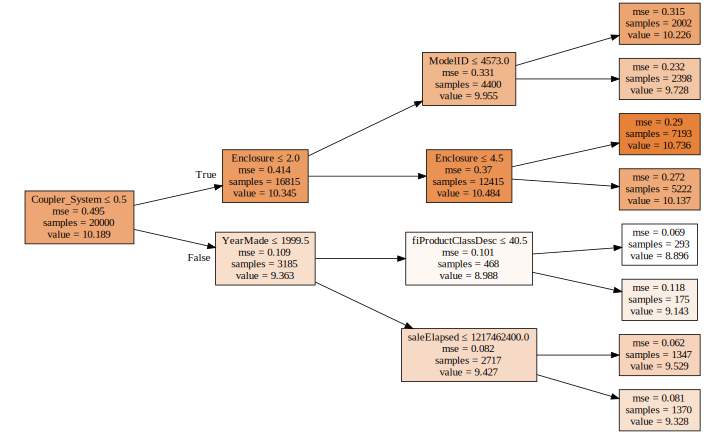

In [0]:
draw_tree(m.estimators_[0], df_trn, precision=3)

Let's see what happens if we create a bigger tree.

In [0]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[6.526751786450488e-17, 0.38473652894699306, 1.0, 0.73565273648797624]


The training set result looks great! But the validation set is worse than our original model. This is why we need to use *bagging* of multiple trees to get more generalizable results.

## Bagging

### Intro to bagging

To learn about bagging in random forests, let's start with our basic model again.

In [0]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.11745691160954547, 0.27959279688230376, 0.97139456205050101, 0.86039533492251219]


We'll grab the predictions for each individual tree, and look at one example.

In [0]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([ 9.21034,  8.9872 ,  8.9872 ,  8.9872 ,  8.9872 ,  9.21034,  8.92266,  9.21034,  9.21034,  8.9872 ]),
 9.0700003890739005,
 9.1049798563183568)

In [0]:
preds.shape

(10, 12000)

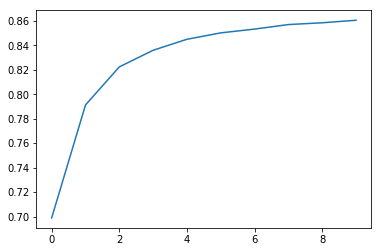

In [0]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

The shape of this curve suggests that adding more trees isn't going to help us much. Let's check. (Compare this to our original model on a sample)

In [0]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.10721195540628872, 0.2777358026154778, 0.9761670456844791, 0.86224362387001874]


In [0]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.1029319603663909, 0.2725488716109634, 0.97803192843821529, 0.86734099039701873]


In [0]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09942284423261978, 0.27026457977935875, 0.97950425012208453, 0.86955536025947799]


### Out-of-bag (OOB) score

Is our validation set worse than our training set because we're over-fitting, or because the validation set is for a different time period, or a bit of both? With the existing information we've shown, we can't tell. However, random forests have a very clever trick called *out-of-bag (OOB) error* which can handle this (and more!)

The idea is to calculate error on the training set, but only include the trees in the calculation of a row's error where that row was *not* included in training that tree. This allows us to see whether the model is over-fitting, without needing a separate validation set.

This also has the benefit of allowing us to see whether our model generalizes, even if we only have a small amount of data so want to avoid separating some out to create a validation set.

This is as simple as adding one more parameter to our model constructor. We print the OOB error last in our `print_score` function below.

In [0]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.10198464613020647, 0.2714485881623037, 0.9786192457999483, 0.86840992079038759, 0.84831537630038534]


This shows that our validation set time difference is making an impact, as is model over-fitting.

## Reducing over-fitting

### Subsampling

It turns out that one of the easiest ways to avoid over-fitting is also one of the best ways to speed up analysis: *subsampling*. Let's return to using our full dataset, so that we can demonstrate the impact of this technique.

In [0]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

The basic idea is this: rather than limit the total amount of data that our model can access, let's instead limit it to a *different* random subset per tree. That way, given enough trees, the model can still see *all* the data, but for each individual tree it'll be just as fast as if we had cut down our dataset as before.

In [0]:
set_rf_samples(20000)

In [0]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 8.38 s, sys: 428 ms, total: 8.81 s
Wall time: 3.49 s
[0.24021020451254516, 0.2780622994610262, 0.87937208432405256, 0.86191954999425424, 0.86692047674867767]


Since each additional tree allows the model to see more data, this approach can make additional trees more useful.

In [0]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.2317315086850927, 0.26334275954117264, 0.89225792718146846, 0.87615150359885019, 0.88097587673696554]


### Tree building parameters

We revert to using a full bootstrap sample in order to show the impact of other over-fitting avoidance methods.

In [0]:
reset_rf_samples()

Let's get a baseline for this full set to compare to.

In [0]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [0]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07828713008286803, 0.23818558990341943, 0.9871909898049919, 0.8986837887808402, 0.9085077721150765]


In [0]:
t=m.estimators_[0].tree_

In [0]:
dectree_max_depth(t)

45

In [0]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.14073508031497292, 0.23337403295759937, 0.9586057939941005, 0.9027357960501001, 0.9068706269691232]


In [0]:
t=m.estimators_[0].tree_

In [0]:
dectree_max_depth(t)

35

Another way to reduce over-fitting is to grow our trees less deeply. We do this by specifying (with `min_samples_leaf`) that we require some minimum number of rows in every leaf node. This has two benefits:

- There are less decision rules for each leaf node; simpler models should generalize better
- The predictions are made by averaging more rows in the leaf node, resulting in less volatility

In [0]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.11595869956476182, 0.23427349924625201, 0.97209195463880227, 0.90198460308551043, 0.90843297242839738]


We can also increase the amount of variation amongst the trees by not only use a sample of rows for each tree, but to also using a sample of *columns* for each *split*. We do this by specifying `max_features`, which is the proportion of features to randomly select from at each split.

- None
- 0.5
- 'sqrt'

- 1, 3, 5, 10, 25, 100

In [0]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.11926975747908228, 0.22869111042050522, 0.97026995966445684, 0.9066000722129437, 0.91144914977164715]


We can't compare our results directly with the Kaggle competition, since it used a different validation set (and we can no longer to submit to this competition) - but we can at least see that we're getting similar results to the winners based on the dataset we have.

The sklearn docs [show an example](http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html) of different `max_features` methods with increasing numbers of trees - as you see, using a subset of features on each split requires using more trees, but results in better models:
![sklearn max_features chart](http://scikit-learn.org/stable/_images/sphx_glr_plot_ensemble_oob_001.png)